#### PRÁCTICA INTEGRADORA: PANDAS Y SERIES DE TIEMPO
## CoronelB

**Ejercicio 1:**

Cargar este archivo en Python. Realizar estadísticas descriptivas básicas

In [7]:
# Importación de paquetes
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:

dfurl = 'https://drive.google.com/file/d/1Msf9fKLNyQJFmZbPecSe1G23kjkPg-ap/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + dfurl.split('/')[-2]
dfHR = pd.read_csv(url, encoding='latin1')
df = dfHR

In [26]:
# Add to EmpID as pk
dfHR.index = dfHR['EmpID']
dfHR.index  

Int64Index([10026, 10084, 10196, 10088, 10069, 10002, 10194, 10062, 10114,
            10250,
            ...
            10048, 10204, 10264, 10033, 10174, 10135, 10301, 10010, 10043,
            10271],
           dtype='int64', name='EmpID', length=311)

In [22]:
# Full date frame
dfHR

,ï»¿Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
10084,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
10196,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
10088,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
10069,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
10301,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
10010,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16


In [27]:
# Delete to EmpID from columns
dfHR = dfHR.drop('EmpID', axis='columns')
dfHR


,ï»¿Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
10088,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
10069,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,"Woodson, Jason",0,0,1,1,5,3,0,65893,0,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
10301,"Ybarra, Catherine",0,0,0,5,5,1,0,48513,1,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
10010,"Zamora, Jennifer",0,0,0,1,3,4,0,220450,0,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16


In [12]:
dfHR.describe()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [31]:
dfHR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 10026 to 10271
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ï»¿Employee_Name            311 non-null    object 
 1   MarriedID                   311 non-null    int64  
 2   MaritalStatusID             311 non-null    int64  
 3   GenderID                    311 non-null    int64  
 4   EmpStatusID                 311 non-null    int64  
 5   DeptID                      311 non-null    int64  
 6   PerfScoreID                 311 non-null    int64  
 7   FromDiversityJobFairID      311 non-null    int64  
 8   Salary                      311 non-null    int64  
 9   Termd                       311 non-null    int64  
 10  PositionID                  311 non-null    int64  
 11  Position                    311 non-null    object 
 12  State                       311 non-null    object 
 13  Zip                         3

**Ejercicio 2:**

Realizar un histograma con los salarios. Qué rango(s) de salarios son los más populares?

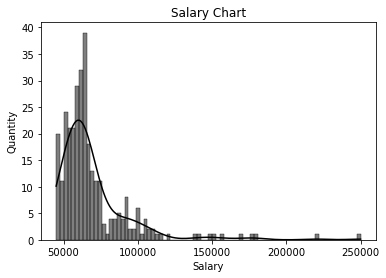

In [34]:
plt.figure()
ax = sns.histplot(data=df, x='Salary', bins=80, kde=True, color="black") 
ax.set(xlabel='Salary', ylabel='Quantity', title='Salary Chart')
allModes = pd.Series(df[["Salary"]].values.flatten()).mode()
mode = allModes.values[-1]
plt.show()

In [35]:
print("El salario más popular es $",mode)


El salario más popular es $ 63025


**Ejercicio 3:**

Realizar un gráfico de violín con los salarios, discriminados por género.

Text(0, 0.5, 'Salary')

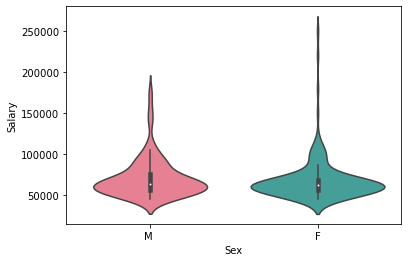

In [36]:
fg = sns.violinplot(data=df, x='Sex', y='Salary', palette='husl')

plt.xlabel('Sex')
plt.ylabel('Salary')

**Ejercicio 4:**

Graficar la serie de tiempo correspondiente a la fecha de contratación (DateofHire)

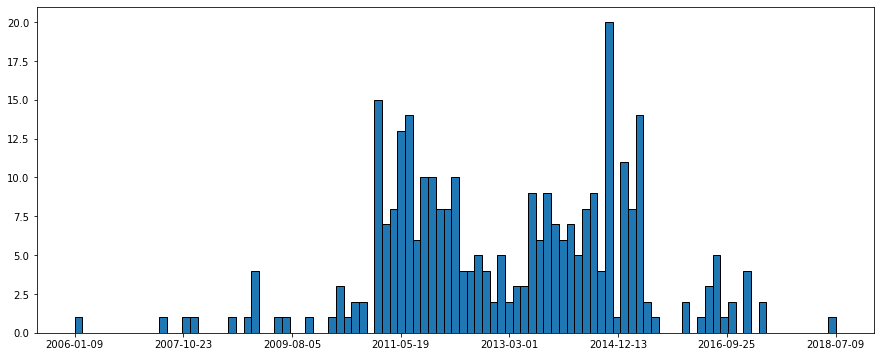

In [37]:
df=dfHR
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
plt.figure(figsize=(15,6))
plt.hist(df["DateofHire"],bins = pd.date_range(df["DateofHire"].min(), df["DateofHire"].max(), 100), edgecolor = "black")
plt.xticks(pd.date_range(df["DateofHire"].min(), df["DateofHire"].max(),8))
df = df.set_index('DateofHire')